# Sales price prediction

In Python, sales price prediction is achieved through machine learning models that analyze historical sales data to identify patterns and relationships between various factors such as product features, market conditions, and customer demographics. Leveraging libraries like scikit-learn or TensorFlow, predictive models are trained on a dataset containing past sales and corresponding features. These models can then forecast future sales prices, enabling businesses to make informed decisions on pricing strategies, inventory management, and market positioning. Python's flexibility and rich ecosystem of data science tools make it a powerful choice for developing accurate and efficient sales price prediction models, enhancing decision-making in the dynamic realm of sales and marketing.

In [58]:
data = pd.read_csv('car_purchasing.csv', encoding='ISO-8859-1')

In [59]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
data.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [8]:
data.shape

(500, 9)

In [9]:
data.dtypes

customer name           object
customer e-mail         object
country                 object
gender                   int64
age                    float64
annual Salary          float64
credit card debt       float64
net worth              float64
car purchase amount    float64
dtype: object

In [10]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [11]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [13]:
data.nunique()

customer name          498
customer e-mail        500
country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

In [14]:
data.isnull().sum() # to check for null values

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [15]:
data.duplicated().any() # to check for dulpicated values

False

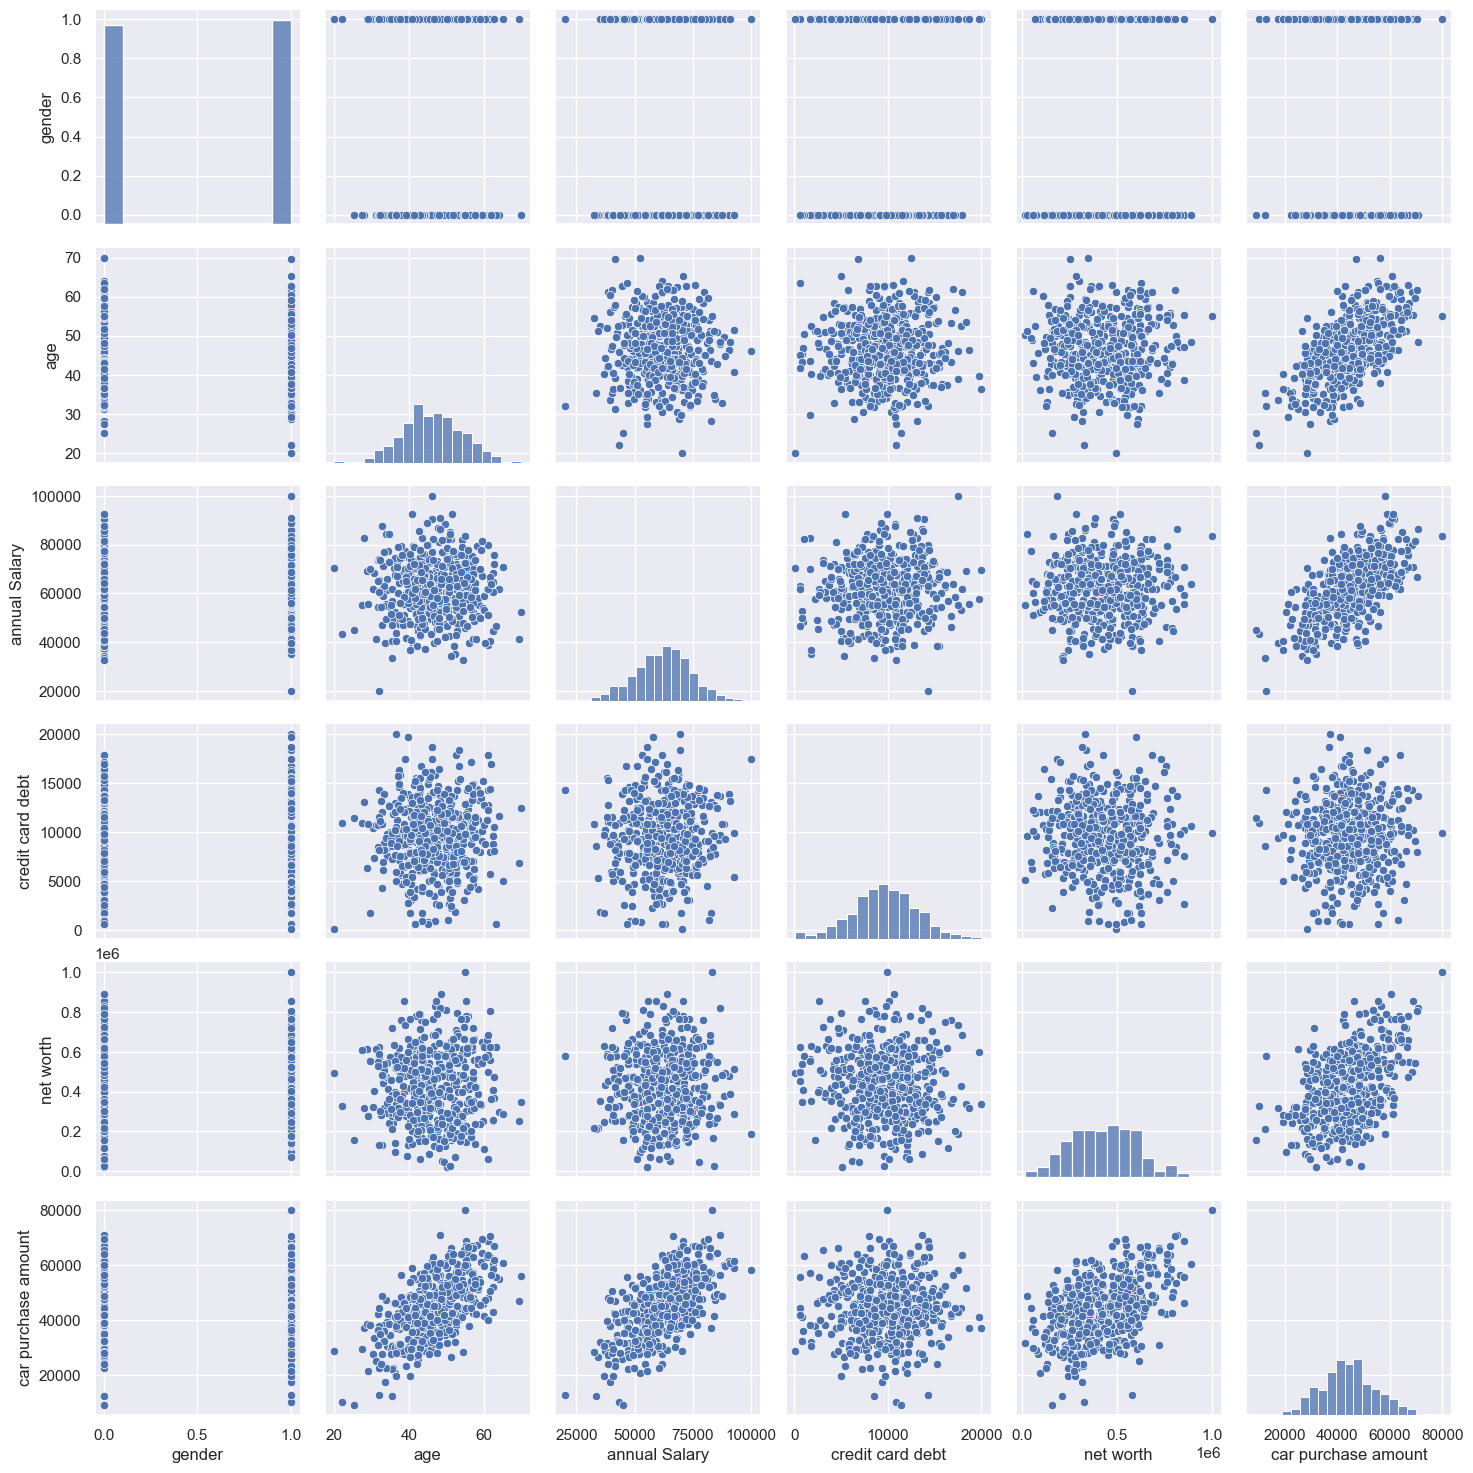

In [16]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(data)

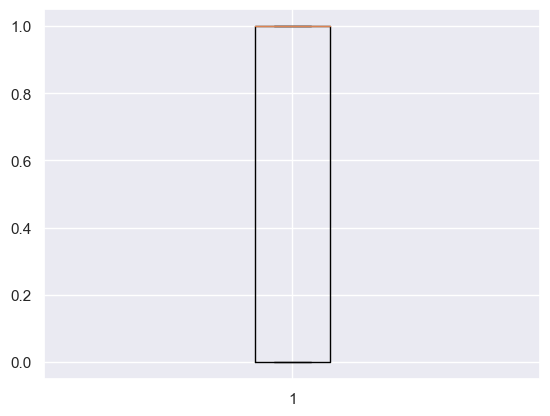

In [21]:
import matplotlib.pyplot as plt 
plt.boxplot(data['gender'])
plt.show()

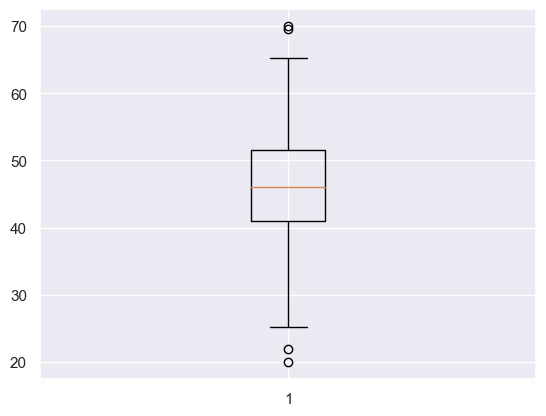

In [22]:
import matplotlib.pyplot as plt 
plt.boxplot(data['age'])
plt.show()

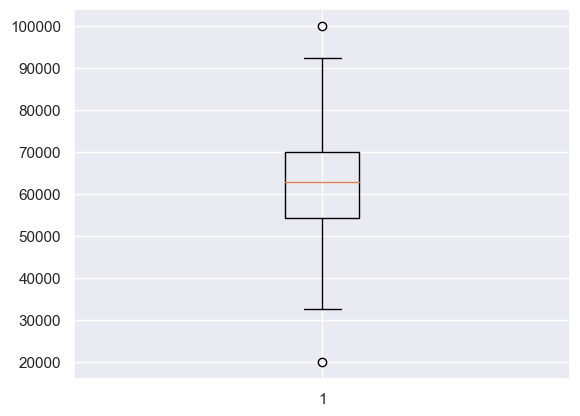

In [23]:
import matplotlib.pyplot as plt 
plt.boxplot(data['annual Salary'])
plt.show()

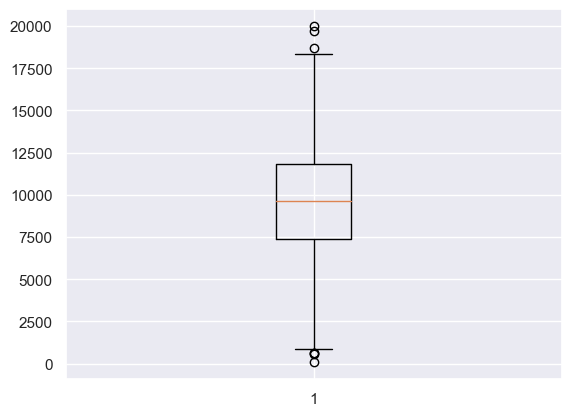

In [24]:
import matplotlib.pyplot as plt 
plt.boxplot(data['credit card debt'])
plt.show()

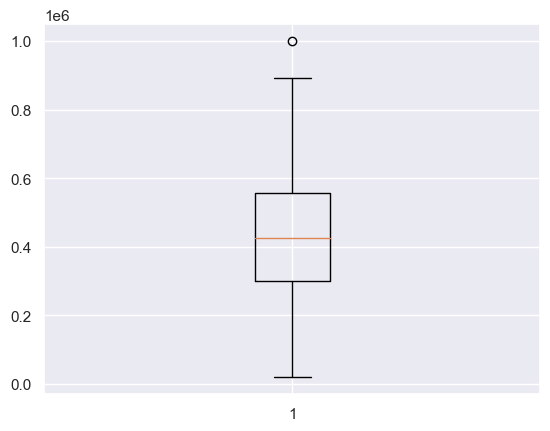

In [25]:
import matplotlib.pyplot as plt 
plt.boxplot(data['net worth'])
plt.show()

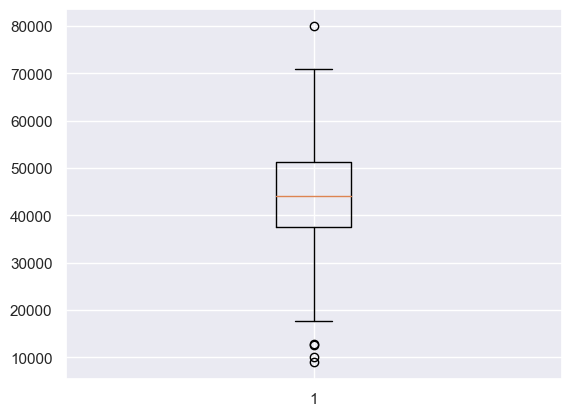

In [26]:
import matplotlib.pyplot as plt 
plt.boxplot(data['car purchase amount'])
plt.show()

<Axes: >

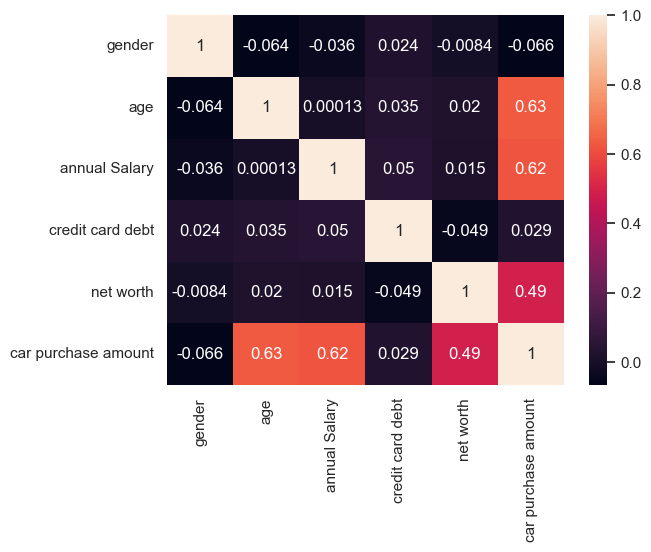

In [28]:
import seaborn as sns

# Specify the numeric columns explicitly
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)


# Multivariate Linear Regression on Advertising Data

In [30]:
x = data[['gender', 'age', 'annual Salary', 'credit card debt','net worth']]
y = data['car purchase amount']

In [32]:
from sklearn.linear_model import LinearRegression # importing the model

In [33]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.9999999812352749

In [34]:
from sklearn.model_selection import train_test_split # to split data into train set and test set 

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state = 1)

In [36]:
x_train.size

1675

In [37]:
x_test.size


825

In [38]:
model.fit(x_train,y_train) 
model.intercept_.round(3) # to chech estimated intercept from model 

-42147.47

In [39]:
model.coef_.round(3) # to check the coefficients of the features

array([-4.80000e-02,  8.41569e+02,  5.62000e-01, -0.00000e+00,
        2.90000e-02])

In [40]:
ytest_pred = model.predict(x_test)
ytest_pred.size

165

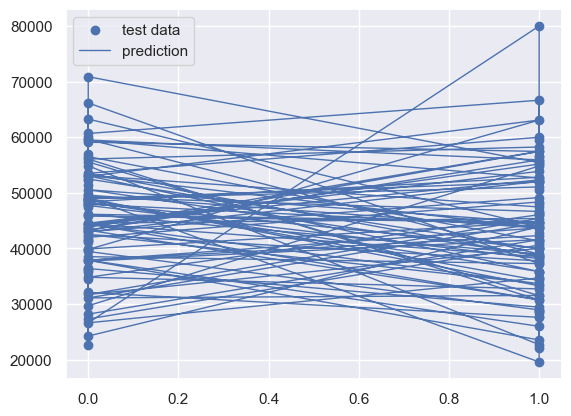

In [42]:
plt.scatter(x_test['gender'],y_test, label ='test data');
plt.plot(x_test['gender'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

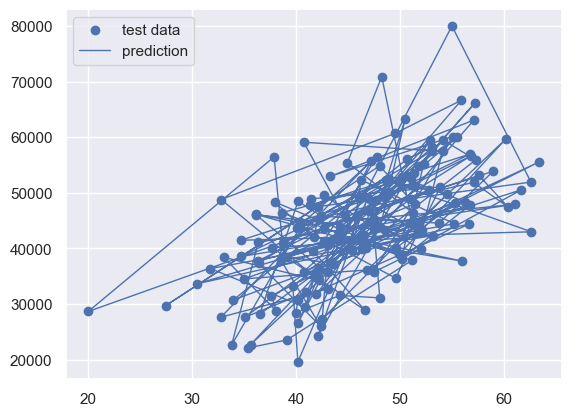

In [43]:
plt.scatter(x_test['age'],y_test, label ='test data');
plt.plot(x_test['age'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

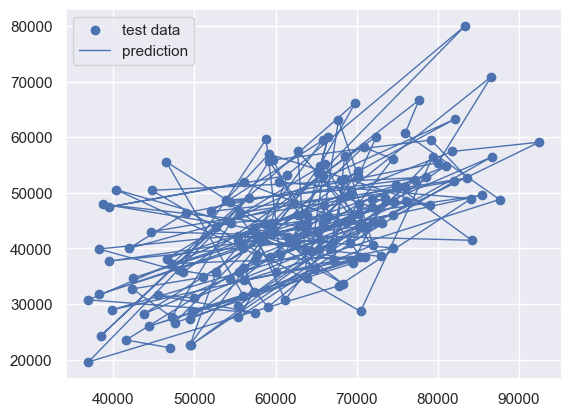

In [44]:
plt.scatter(x_test['annual Salary'],y_test, label ='test data');
plt.plot(x_test['annual Salary'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

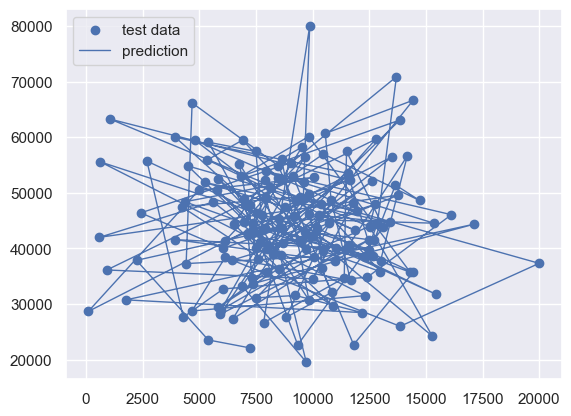

In [45]:
plt.scatter(x_test['credit card debt'],y_test, label ='test data');
plt.plot(x_test['credit card debt'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

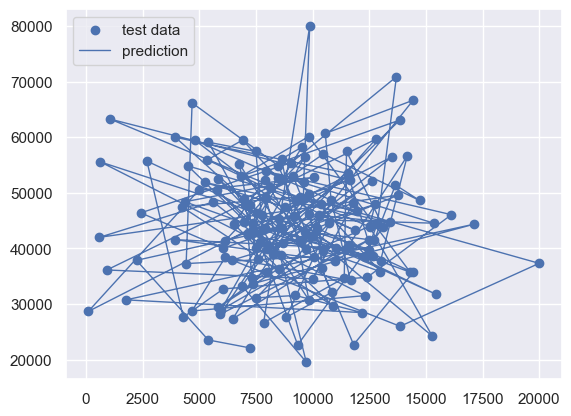

In [45]:
plt.scatter(x_test['credit card debt'],y_test, label ='test data');
plt.plot(x_test['credit card debt'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

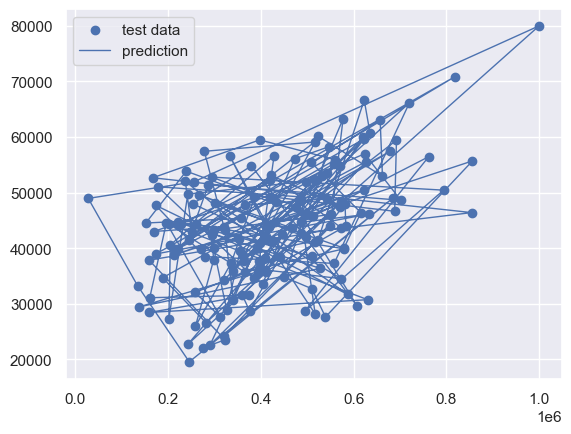

In [46]:
plt.scatter(x_test['net worth'],y_test, label ='test data');
plt.plot(x_test['net worth'],ytest_pred, label ='prediction', linewidth=1)
plt.legend(loc='upper left')
plt.show()

In [48]:
residuals = y_test - ytest_pred
residuals.head()

304    0.581169
340   -1.343779
47    -0.226900
67     0.756632
479   -1.295290
Name: car purchase amount, dtype: float64

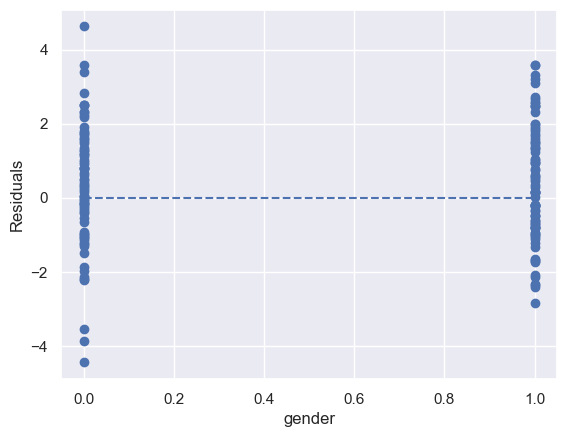

In [49]:
plt.scatter(x_test['gender'], residuals)
plt.hlines(y=0, xmin= x_test['gender'].min(), xmax= x_test['gender'].max(), linestyle ='--')

plt.xlabel('gender')
plt.ylabel('Residuals')
plt.show()

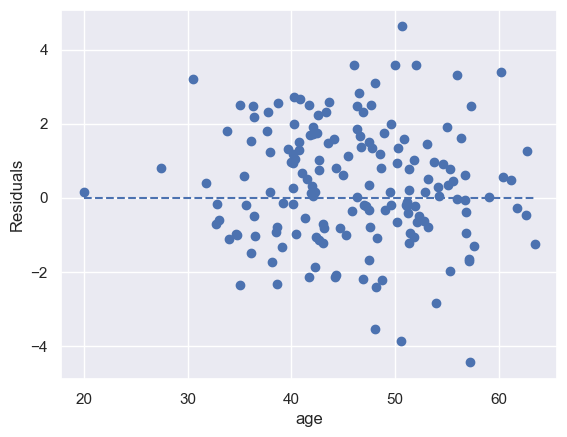

In [50]:
plt.scatter(x_test['age'], residuals)
plt.hlines(y=0, xmin= x_test['age'].min(), xmax= x_test['age'].max(), linestyle ='--')

plt.xlabel('age')
plt.ylabel('Residuals')
plt.show()

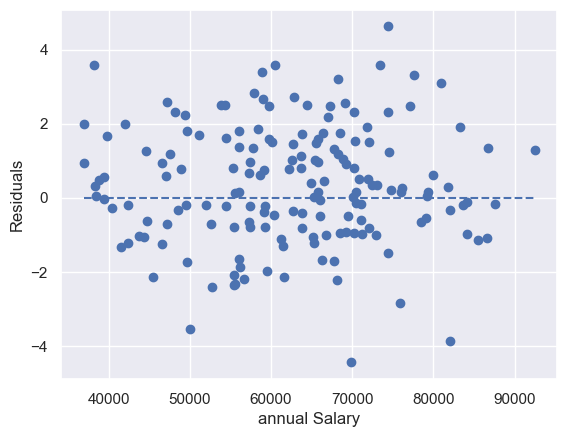

In [51]:
plt.scatter(x_test['annual Salary'], residuals)
plt.hlines(y=0, xmin= x_test['annual Salary'].min(), xmax= x_test['annual Salary'].max(), linestyle ='--')

plt.xlabel('annual Salary')
plt.ylabel('Residuals')
plt.show()

In [52]:
residuals.mean() # to get the average of all residuals

0.3425273118472736

In [53]:
(residuals**2).mean() # to get the mean squared error or 


2.651392807201816

In [54]:
from sklearn.metrics import mean_squared_error # use this method 
mean_squared_error (y_test,ytest_pred)

2.651392807201816

C:\Users\Suraj Dass\AppData\Local\Temp\ipykernel_6888\590416611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-ytest_pred)) # to check if errors are normally distributed


<Axes: xlabel='car purchase amount', ylabel='Density'>

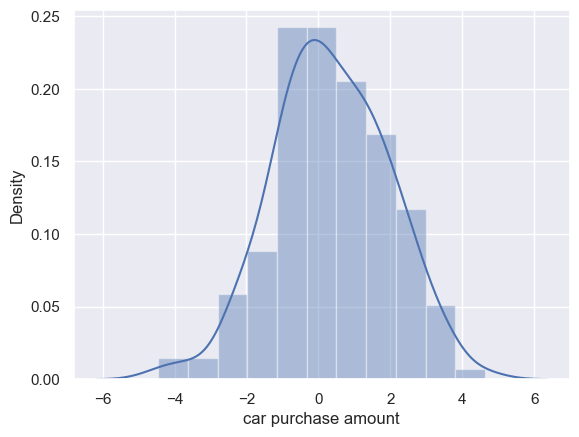

In [56]:
sns.distplot((y_test-ytest_pred)) # to check if errors are normally distributed


# Thank you